In [1]:
library('infer')
library('tidyverse')     

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Fair coin example with infer package

In [3]:
heads_140 = data.frame(
    toss = c(rep('heads', 140), rep('tails', 250 - 140))
)

heads_140 |> head()

,toss
,<chr>
1,heads
2,heads
3,heads
4,heads
5,heads
6,heads


In [4]:
heads_140 |> count(toss)

toss,n
<chr>,<int>
heads,140
tails,110


In [5]:
obs_n_heads = heads_140 |>
    specify(response = toss, success = 'heads') |>
    calculate(stat = 'count')

obs_n_heads

stat
<int>
140


In [6]:
heads_140 |>
    summarize(stat = sum(toss == 'heads'))

stat
<int>
140


In [7]:
null_dist = heads_140 |>
    specify(response = toss, success = 'heads') |>
    hypothesize('point', p = 0.5) |>
    generate(reps = 1000, type = 'draw') |>
    calculate(stat = 'count')

null_dist |> head()
     

replicate,stat
<int>,<int>
1,138
2,137
3,144
4,118
5,124
6,114


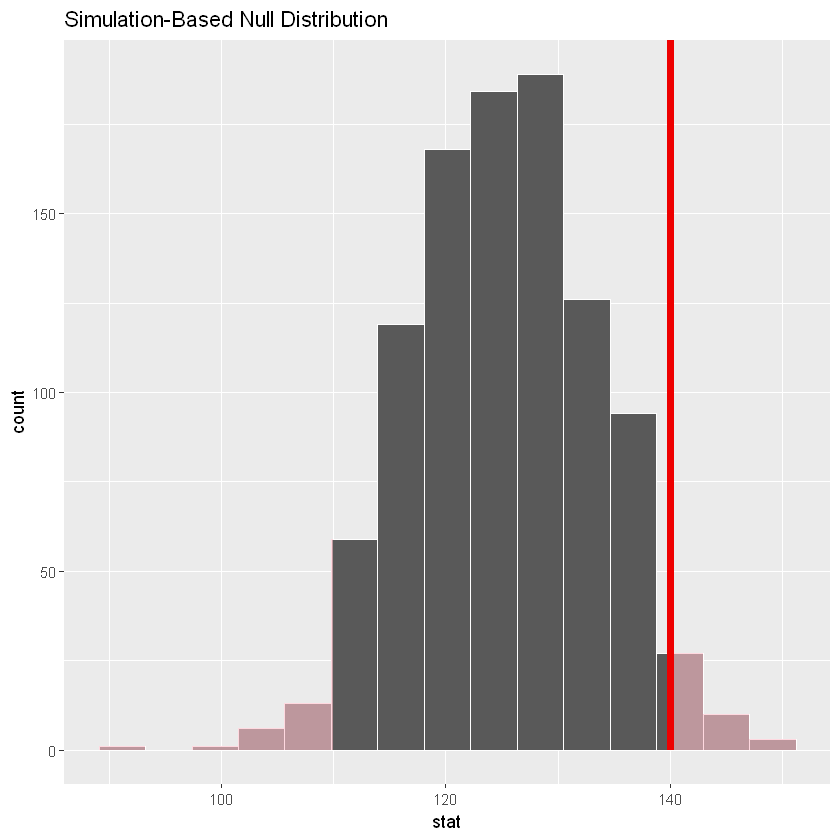

In [8]:
null_dist |> 
    visualize() + 
    shade_p_value(obs_stat = obs_n_heads, direction = 'two-sided')

In [9]:

null_dist |> get_p_value(obs_stat = 140, direction = 'two-sided')

p_value
<dbl>
0.058


In [10]:
nsfg = read_csv('nsfg_simple.csv', col_types = cols())

nsfg |> head()

ERROR: Error: 'nsfg_simple.csv' does not exist in current working directory ('c:/Users/agung/Data 730/moderndive/inclass').


In [ ]:
nsfg |> summarize(cor_coef = cor(agepreg, totalwgt_lb, method = 'pearson'))

In [ ]:
nsfg |>
    specify(response = totalwgt_lb, explanatory = agepreg) |>
    calculate(stat = 'correlation')

In [ ]:
null_dist_nsfg = nsfg |>
    specify(response = totalwgt_lb, explanatory = agepreg) |>
    hypothesize('independence') |>
    generate(reps = 1000, type = 'permute') |>
    calculate(stat = 'correlation')

null_dist_nsfg |> head()

In [ ]:
null_dist_nsfg |> 
    visualize() + 
    shade_p_value(obs_stat = 0.0688, direction = 'two-sided')

In [ ]:
nsfg |> get_p_value(obs_stat = 0.06883397, direction = 'two-sided')

In [ ]:
ggplot(nsfg, aes(x = agepreg, totalwgt_lb)) + 
    geom_point(alpha = 0.1) +
    stat_smooth(method = 'lm')